## Notebook

Data credit: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Secondary Mushroom Dataset by Dennis Wagner, D. Heider, and Georges Hattab. 2021
Courtesy of UC Irvine

In [3]:
# temporary code block for static csv
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
df = pd.read_csv("secondary_data.csv", delimiter=';')

In [4]:
# import dependencies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import pandas as pd

In [5]:
# # run sql engine and query data
# dataset = 'sql dataset file path goes here'
# engine = create_engine(f"sqlite:///{dataset}")
# conn = engine.connect()

# df = pd.read_sql("SELECT * FROM table", conn)

In [6]:
df # view the dataset

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [7]:
# creating a summary table showing each column, its data type, number of unique values, and missing values
summary_data = [(x, df[x].dtype,
                 len(df[x].unique()),
                 len(df[df[x].isna()])) for x in df.columns]

summary_table = pd.DataFrame(summary_data, columns=['Column','Data Type',
                                                    'Unique Values', 'Missing Values'])
summary_table['Percentage'] = round(summary_table['Missing Values'] / len(df), 2)

summary_table.sort_values('Missing Values', ascending=False)

,Column,Data Type,Unique Values,Missing Values,Percentage
14,veil-type,object,2,57892,0.95
18,spore-print-color,object,8,54715,0.90
15,veil-color,object,7,53656,0.88
11,stem-root,object,6,51538,0.84
12,stem-surface,object,9,38124,0.62
7,gill-spacing,object,4,25063,0.41
3,cap-surface,object,12,14120,0.23
6,gill-attachment,object,8,9884,0.16
17,ring-type,object,9,2471,0.04
0,class,object,2,0,0.00


In [8]:
# dropping columns with excessive missing values (30,000 or more)
df = df.drop(columns=['stem-root', 'stem-surface',
                      'veil-type', 'veil-color',
                      'spore-print-color'], axis=1)

# dropping remaining rows with na values
df = df.dropna()

In [9]:
# separating the target variable
X = df.drop(columns='class')
X = X.reset_index(drop=True)

# separating categorical from numerical features
X_categorical = X.select_dtypes(include='O')
X_numeric = X.select_dtypes(exclude='O')

# scaling numerical features
X_numeric_scaled = StandardScaler().fit_transform(X_numeric)
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# getting dummies of the categorical features
dummies = pd.get_dummies(X_categorical, dtype=int)

# concatenating dummies to the numeric columns
X_clean = pd.concat([dummies, X_numeric_scaled], axis=1)

In [10]:
# Instantiate PCA and fit the model
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_clean)

X_pca[:5]

array([[ 1.52215957,  2.67622   , -0.20303192, -0.06905353,  0.67189206],
       [ 1.8258888 ,  2.90185351, -0.25960166, -0.16851162,  0.54118739],
       [ 2.20352224,  2.88626499, -0.10220564, -0.45005217,  0.45125911],
       [ 1.78727169,  2.58686533, -0.09503907, -0.36604938,  0.4496115 ],
       [ 1.90265998,  2.78831492, -0.11164185, -0.38045561,  0.4834182 ]])

In [11]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742793, 0.05001076, 0.04627043])

In [12]:
# splitting training and testing for regular dataset
X_train, X_test, y_train, y_test = train_test_split(X_clean, df['class'])

# splitting training and testing for pca dataset
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, df['class'])

## Run random forest classifier with the original dataset

In [13]:
# create StandardScaler instance for original dataset
scaler = StandardScaler()

In [14]:
# fit Standard Scaler
X_scaler = scaler.fit(X_train)

In [15]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=33)

In [17]:
# fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [18]:
# make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [19]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,968,1493
Actual 1,1213,1886


Accuracy Score : 0.5133093525179856
Classification Report
              precision    recall  f1-score   support

           e       0.44      0.39      0.42      2461
           p       0.56      0.61      0.58      3099

    accuracy                           0.51      5560
   macro avg       0.50      0.50      0.50      5560
weighted avg       0.51      0.51      0.51      5560



In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.009601766050999137, 'cap-surface'),
 (0.007430300296018814, 'gill-spacing'),
 (0.006327700750565385, 'gill-attachment'),
 (0.0041898149559930625, 'season'),
 (0.0033535340803876167, 'stem-color'),
 (0.0025618858541473426, 'gill-color'),
 (0.0024263638216057647, 'cap-diameter'),
 (0.0010527857122996664, 'does-bruise-or-bleed'),
 (0.001022076659407842, 'ring-type'),
 (0.0008385891181351185, 'stem-height'),
 (0.000634649755005948, 'has-ring'),
 (0.00045072789502408446, 'habitat'),
 (0.0004399474632428573, 'stem-width'),
 (0.0004191988761301296, 'cap-color'),
 (0.00024176393413997572, 'cap-shape')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

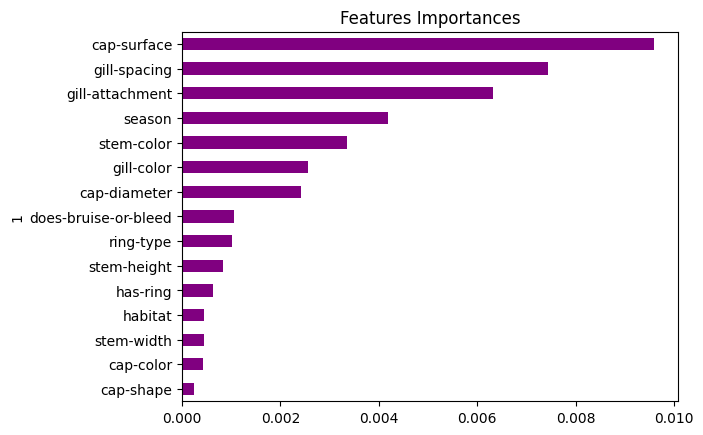

In [22]:
# visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='purple', title= 'Features Importances', legend=False)

## Create Logistic Regression Model with original data

In [23]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=3)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=3)

In [24]:
# Make a prediction using the testing data
predictions2 = classifier.predict(X_test)

In [25]:
# Generate a confusion matrix for the model
confusion2 = confusion_matrix(y_test, predictions2)
print(confusion2)

[[  86 2375]
 [  97 3002]]


In [26]:
# Print the classification report for the model
classification_test = classification_report(y_test, predictions2)
print(classification_test)

              precision    recall  f1-score   support

           e       0.47      0.03      0.07      2461
           p       0.56      0.97      0.71      3099

    accuracy                           0.56      5560
   macro avg       0.51      0.50      0.39      5560
weighted avg       0.52      0.56      0.42      5560



## Run random forest classifier with pca data

In [27]:
# create StandardScaler instance with pca data
pca_scaler = StandardScaler()

In [28]:
# fit pca data Standard Scaler
X_pca_scaler = scaler.fit(X_pca_train)

In [29]:
# scale the pca data
X_pca_train_scaled = X_pca_scaler.transform(X_pca_train)
X_pca_test_scaled = X_pca_scaler.transform(X_pca_test)

In [30]:
# Create a random forest classifier with pca data
rf_pca_model = RandomForestClassifier(n_estimators=300, random_state=33)

In [31]:
# Fitting the model with pca data
rf_pca_model = rf_pca_model.fit(X_pca_train_scaled, y_train)

In [32]:
# Making predictions using the testing data with pca data
pca_predictions = rf_pca_model.predict(X_pca_test_scaled)

In [33]:
# Calculating the confusion matrix with pca data
pca_cm = confusion_matrix(y_test, pca_predictions)
pca_cm_df = pd.DataFrame(
    pca_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score with pca data
pca_acc_score = accuracy_score(y_test, pca_predictions)

In [34]:
# Displaying results with pca data
print("Confusion Matrix")
display(pca_cm_df)
print(f"Accuracy Score : {pca_acc_score}")
print("Classification Report")
print(classification_report(y_test, pca_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2429,32
Actual 1,39,3060


Accuracy Score : 0.9872302158273382
Classification Report
              precision    recall  f1-score   support

           e       0.98      0.99      0.99      2461
           p       0.99      0.99      0.99      3099

    accuracy                           0.99      5560
   macro avg       0.99      0.99      0.99      5560
weighted avg       0.99      0.99      0.99      5560



In [35]:
# Random Forests in sklearn will automatically calculate feature importance
pca_importances = rf_pca_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_pca_model.feature_importances_, X.columns), reverse=True)

[(0.3310117623613093, 'cap-surface'),
 (0.20448232347960887, 'cap-diameter'),
 (0.17738740850020052, 'cap-shape'),
 (0.15895830178931053, 'does-bruise-or-bleed'),
 (0.12816020386957078, 'cap-color')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

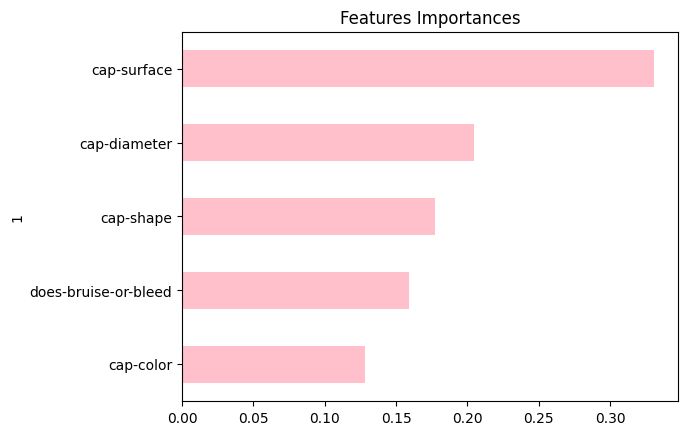

In [36]:
# Visualize the features by importance
pca_importances_df = pd.DataFrame(sorted(zip(rf_pca_model.feature_importances_, X.columns), reverse=True))
pca_importances_df.set_index(pca_importances_df[1], inplace=True)
pca_importances_df.drop(columns=1, inplace=True)
pca_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
pca_importances_sorted = pca_importances_df.sort_values(by='Feature Importances')
pca_importances_sorted.plot(kind='barh', color='pink', title= 'Features Importances', legend=False)

## Create Logistic Regression Model with PCA data

In [37]:
# Instantiate PCA and fit the model
pca2 = PCA(n_components=3)
X_pca2 = pca2.fit_transform(X_clean)

X_pca2[:5]

array([[ 1.52215955,  2.67621635, -0.20320328],
       [ 1.82588878,  2.90185021, -0.25975826],
       [ 2.20352222,  2.88626376, -0.10226534],
       [ 1.78727168,  2.58686161, -0.09518948],
       [ 1.90265997,  2.78831309, -0.11174925]])

In [38]:
# Calculate the PCA explained variance ratio
pca2.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742793])

In [39]:
# splitting training and testing for pca dataset
X_pca_train2, X_pca_test2, y_train, y_test = train_test_split(X_pca2, df['class'])

In [40]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
pca_classifier = LogisticRegression(solver='lbfgs',
                                max_iter=300,
                                random_state=3)

# Fit the model using training data
pca_classifier.fit(X_pca_train2, y_train)

LogisticRegression(max_iter=300, random_state=3)

In [41]:
# Make a prediction using the testing data
predictions_pca = pca_classifier.predict(X_pca_test2)

In [42]:
# Generate a confusion matrix for the model
confusion_pca = confusion_matrix(y_test, predictions_pca)
print(confusion_pca)

[[1500  944]
 [ 662 2454]]


In [43]:
# Print the classification report for the model
classification_test_pca = classification_report(y_test, predictions_pca)
print(classification_test_pca)

              precision    recall  f1-score   support

           e       0.69      0.61      0.65      2444
           p       0.72      0.79      0.75      3116

    accuracy                           0.71      5560
   macro avg       0.71      0.70      0.70      5560
weighted avg       0.71      0.71      0.71      5560



## YDF (Yggrasil Decision Forest)

In [44]:
# import dependencies
!pip install ydf -U
import ydf
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 20.1 MB/s eta 0:00:00


In [91]:
print(len(X_clean))

22239


In [93]:
df = df.reset_index(drop=True)
print(df['class'])

0        p
1        p
2        p
3        p
4        p
        ..
22234    p
22235    p
22236    p
22237    p
22238    p
Name: class, Length: 22239, dtype: object


In [94]:
X_clean['class'] = df['class']
X_clean

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,...,habitat_u,habitat_w,season_a,season_s,season_u,season_w,cap-diameter,stem-height,stem-width,class
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.095607,2.499287,0.089404,p
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.114223,2.960471,0.214618,p
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.717913,2.942024,0.229601,p
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.497181,2.514044,0.099036,p
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.412079,2.687450,0.240303,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22234,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,-1.388353,-0.695801,-0.568773,p
22235,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,-1.364418,-0.972512,-0.653319,p
22236,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,-1.364418,-0.721627,-0.552720,p
22237,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1.372397,-0.832312,-0.652249,p


In [95]:
# Use the ~20% of the examples as the testing set
# and the remaining ~80% of the examples as the training set.
label="class"
np.random.seed(3)
is_test = np.random.rand(len(X_clean)) < 0.2

In [96]:
#split datasets
train_dataset = X_clean[~is_test]
test_dataset = X_clean[is_test]

In [97]:
print("Training examples: ", len(train_dataset))

Training examples:  17765


In [98]:
print("Testing examples: ", len(test_dataset))

Testing examples:  4474


In [99]:
# create decision tree with default hyperparameters
model = ydf.CartLearner(label=label).train(train_dataset)

Train model on 17765 examples
Model trained in 0:00:00.064660


In [100]:
model.plot_tree()

In [101]:
train_evaluation = model.evaluate(train_dataset)
print("train accuracy:", train_evaluation.accuracy)

train accuracy: 0.9980861244019139


In [102]:
test_evaluation = model.evaluate(test_dataset)
print("test accuracy:", test_evaluation.accuracy)

test accuracy: 0.9962002682163612


In [104]:
model2 = ydf.GradientBoostedTreesLearner(label=label, num_trees=100).train(X_clean)

Train model on 22239 examples
Model trained in 0:00:30.066755


In [106]:
print("Test accuracy: ", model2.evaluate(train_dataset).accuracy)

Test accuracy:  0.9995496763298621


In [107]:
print("Test accuracy: ", model2.evaluate(test_dataset).accuracy)

Test accuracy:  0.9993294590970049


In [111]:
model3 = ydf.GradientBoostedTreesLearner(label=label, num_trees=1000).train(train_dataset)

Train model on 17765 examples
Model trained in 0:02:37.891274


In [112]:
model3.plot_tree()

In [113]:
print("Test accuracy: ", model3.evaluate(train_dataset).accuracy)

Test accuracy:  1.0


In [114]:
print("Test accuracy: ", model3.evaluate(test_dataset).accuracy)

Test accuracy:  1.0
